In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

### traveling salesman

In [2]:
opt = 'GA'
p=2000
ma=1000
mu=200
cpfile = 'tsp/tsp-%s-%d-%d-%d.csv' % (opt, p, ma, mu)
ga = pd.read_csv(cpfile, names=["i", "score", "elapsed"])
ga["p"] = p
ga["ma"] = ma
ga["mu"] = mu
ga["params"] = "pop=%d, mate=%d, mutate=%d" % (p, ma, mu)
ga["opt"] = opt

In [3]:
opt = 'MMC'
s=500
k=50
cpfile = 'tsp/tsp-%s-%d-%d.csv' % (opt, s, k)
mmc = pd.read_csv(cpfile, names=["i", "score", "elapsed"])
mmc["samples"] = s
mmc["tokeep"] = k
mmc["params"] = "samples=%d, tokeep=%d" % (s, k)
mmc["opt"] = "MIMIC"

In [4]:
opt = 'RHC'
i=10000
t=1
cpfile = 'tsp/tsp-%s-%d-%d.csv' % (opt, i, t)
rhc = pd.read_csv(cpfile, names=["i", "score", "elapsed"])
rhc["iterations"] = i
rhc["try"] = t
rhc["params"] = "iterations=%d, try=%d" % (i, t)
rhc["opt"] = opt

In [5]:
opt = 'SA'
t="1E10"
c="0.55"
cpfile = 'tsp/tsp-%s-%s-%s.csv' % (opt, t, c)
sa = pd.read_csv(cpfile, names=["i", "score", "elapsed"])
sa["t"] = t
sa["cooling"] = c
sa["params"] = "t=%s, cooling=%s" % (t, c)
sa["opt"] = opt

In [6]:
cp = pd.DataFrame()
opt = 'SA'
for t in ["1E10"]:
    #for ma in [1000, 500]:
        for c in ["0.15", "0.35", "0.55", "0.75", "0.95"]:
            cpfile = 'tsp/tsp-%s-%s-%s.csv' % (opt, t, c)
            tmp = pd.read_csv(cpfile, names=["i", "score", "elapsed"])
            #tmp["p"] = p
            tmp["t"] = t
            tmp["c"] = c
            tmp["params"] = "t=%s, c=%s" % (t, c)
            if cp.shape[0] == 0:
                cp = tmp.copy(deep=True)
            else:
                cp = cp.append(tmp)

In [7]:
cp.loc[cp["score"] == cp["score"].max(),["params"]].groupby(["params"]).size()

params
t=1E10, c=0.55    2
dtype: int64

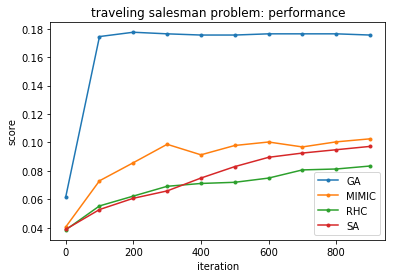

In [8]:
legend = []
for out in [ga, mmc, rhc, sa]:
    ind = np.array(range(100)) % 10 == 0
    x = out.iloc[ind,0]
    y = out.iloc[ind,1]
    plt.plot(x, y, '.-')
    legend.append(out.iloc[0,-1])

plt.legend(legend, loc="best")
plt.ylabel('score')
plt.xlabel('iteration')
plt.title('traveling salesman problem: performance')
plt.gcf()
plt.savefig('tspscore.png')
plt.show()

In [29]:
for out in [ga, mmc, rhc, sa]:
    print out.index.values.max()

99
99
999
99
